In [1]:
import pandas as pd
from scipy import stats
import seaborn as sb

/Users/vima/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
plt.style.use('fivethirtyeight')

In [4]:
df = pd.read_excel('../data/Salaries_South_Africa_Cleaned.xlsx',delimiter='\t')

In [5]:
df.columns

Index([u'Timestamp', u'Employer', u'Location', u'Job_Title',
       u'Years_at_Employer', u'Years_of_Experience',
       u'Annual_Base_Salary_in_Rands', u'Signing_Bonus', u'Annual_Bonus',
       u'Gender', u'Size_of_Company', u'Highest_Qualificaiton'],
      dtype='object')

In [6]:
nu_df = df[['Annual_Base_Salary_in_Rands','Years_at_Employer']].dropna()

In [7]:
nu_df.head()

,Annual_Base_Salary_in_Rands,Years_at_Employer
0,380000.0,2.5
1,216000.0,2.0
2,174000.0,2.0
4,126000.0,0.0
5,126000.0,1.5


In [8]:
(np.abs(stats.zscore(nu_df.Annual_Base_Salary_in_Rands)) < 1.96)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [9]:
clean_nu_df = nu_df[(np.abs(stats.zscore(nu_df.Annual_Base_Salary_in_Rands)) < 1.96)]

In [10]:
clean_nu_df

,Annual_Base_Salary_in_Rands,Years_at_Employer
0,380000.0,2.5
1,216000.0,2.0
2,174000.0,2.0
4,126000.0,0.0
5,126000.0,1.5
6,1080000.0,1.0
7,122000.0,2.0
8,480000.0,1.0
9,160000.0,2.0
10,100000.0,1.0


In [11]:
sal = clean_nu_df['Annual_Base_Salary_in_Rands']
exp = clean_nu_df['Years_at_Employer']

In [12]:
x = exp.dropna().values
y = sal.dropna().values

In [13]:
m, b = np.polyfit(x, y, 1)

/Users/vima/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


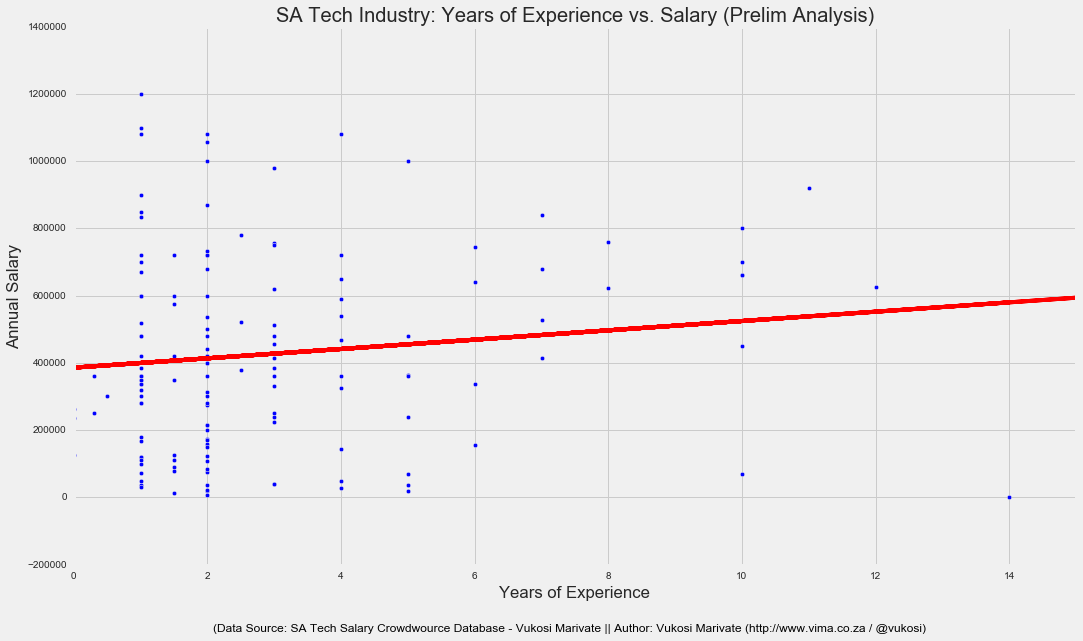

In [14]:
aspect_mult = 1.0
figsize(aspect_mult*16,aspect_mult*9)

linewidth = 3
fig = pyplot.figure()
ax = fig.add_subplot(111) 

ax.scatter(exp.values,sal.values)
ax.set_xlim([0,15])
plt.plot(x, m*x + b, color='r')

ax.set_title("SA Tech Industry: Years of Experience vs. Salary (Prelim Analysis)")
ax.set_ylabel("Annual Salary")
ax.set_xlabel("Years of Experience")

plt.legend(loc="upper left")
plt.text(0.85, -0.125,'(Data Source: SA Tech Salary Crowdwource Database - Vukosi Marivate || Author: Vukosi Marivate (http://www.vima.co.za / @vukosi)',
     horizontalalignment='right',
#      verticalalignment='center',
     transform = ax.transAxes,color='black',fontsize=12)
pyplot.savefig('../plots/prelim.png',bbox_inches='tight', dpi = 300)

In [15]:
gauss_x = np.linspace(min(clean_nu_df.Annual_Base_Salary_in_Rands.values), max(clean_nu_df.Annual_Base_Salary_in_Rands.values),100)
mean = np.mean(clean_nu_df.Annual_Base_Salary_in_Rands.values)
variance = np.var(clean_nu_df.Annual_Base_Salary_in_Rands.values)
sigma = np.sqrt(variance)

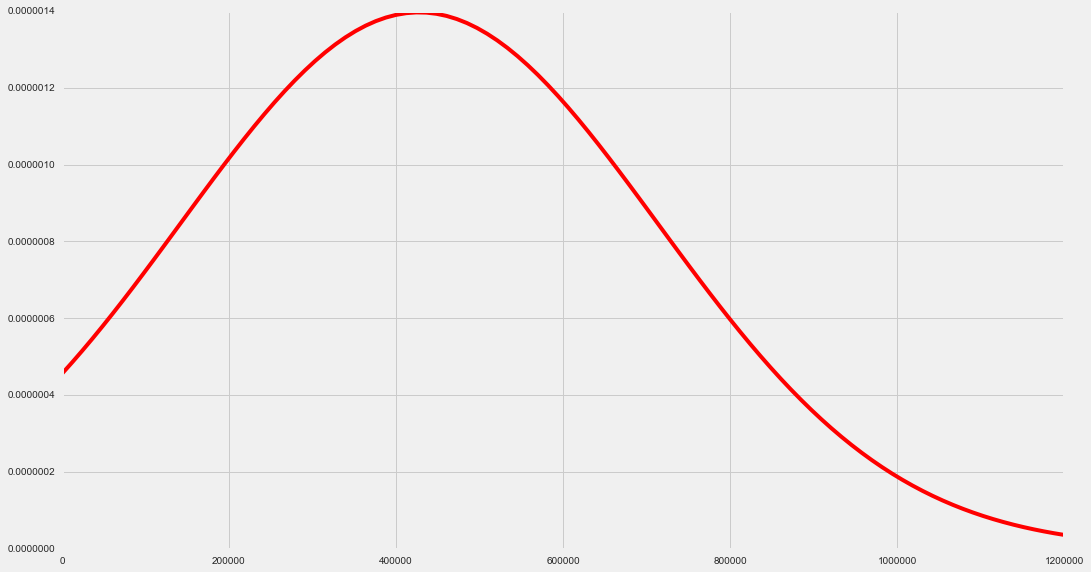

In [17]:
# clean_nu_df.Annual_Base_Salary_in_Rands.hist(bins=20,)
plt.plot(gauss_x,mlab.normpdf(gauss_x,mean,sigma),color='r')

/Users/vima/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: order is deprecated, use sort_values(...)
  app.launch_new_instance()


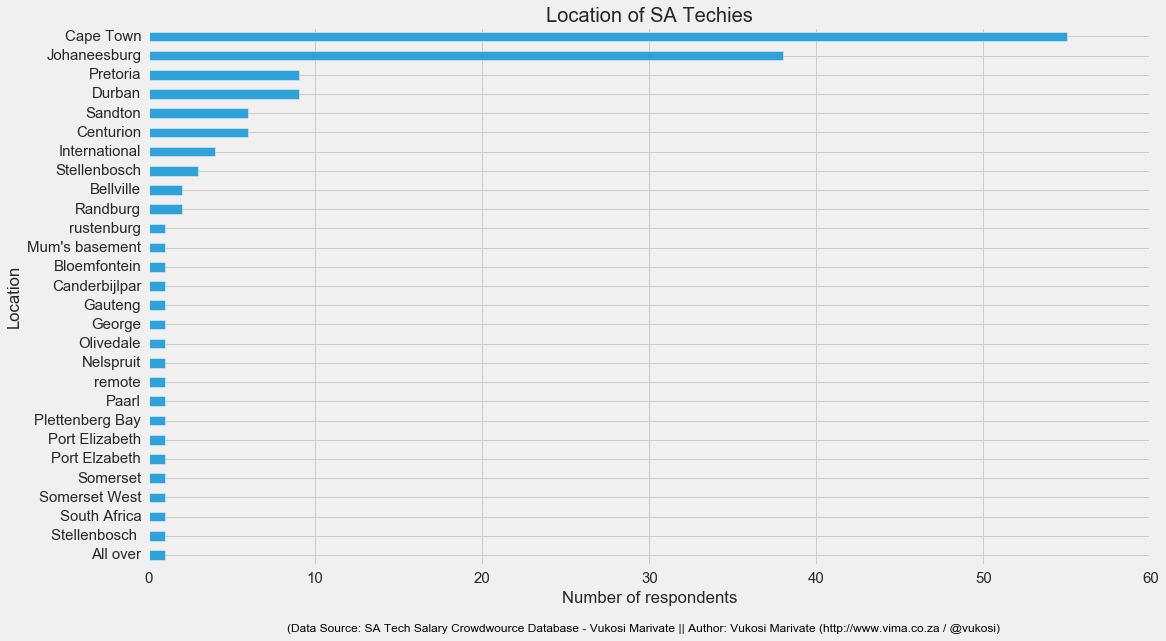

In [18]:
fig = pyplot.figure()
ax = fig.add_subplot(111) 
by_area = df.groupby('Location').size().order()
by_area.plot(kind='barh', fontsize=15)
ax.set_xlabel("Number of respondents")
ax.set_title("Location of SA Techies")
plt.text(0.85, -0.125,'(Data Source: SA Tech Salary Crowdwource Database - Vukosi Marivate || Author: Vukosi Marivate (http://www.vima.co.za / @vukosi)',
     horizontalalignment='right',
#      verticalalignment='center',
     transform = ax.transAxes,color='black',fontsize=12)
pyplot.savefig('../plots/location_bar.png',bbox_inches='tight', dpi = 300)

In [19]:
df.groupby('Location').mean().Annual_Base_Salary_in_Rands.order()

/Users/vima/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


Location
Mum's basement     1.200000e+01
George             6.700000e+03
Olivedale          1.080000e+05
Paarl              1.100000e+05
South Africa       1.220000e+05
Somerset West      1.260000e+05
Port Elzabeth      1.500000e+05
Nelspruit          1.700000e+05
All over           2.160000e+05
Gauteng            2.350000e+05
Pretoria           3.298614e+05
Port Elizabeth     3.300000e+05
Bloemfontein       3.650000e+05
Sandton            3.680000e+05
Randburg           4.150000e+05
Durban             4.173342e+05
Cape Town          4.400030e+05
Centurion          4.550000e+05
Johaneesburg       5.186695e+05
Canderbijlpar      7.000000e+05
Stellenbosch       7.500000e+05
Bellville          7.590000e+05
International      7.810750e+05
rustenburg         8.500000e+05
Stellenbosch       8.986667e+05
remote             1.200000e+06
Somerset           2.400000e+06
Plettenberg Bay    2.600000e+06
Name: Annual_Base_Salary_in_Rands, dtype: float64

/Users/vima/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: order is deprecated, use sort_values(...)
  app.launch_new_instance()


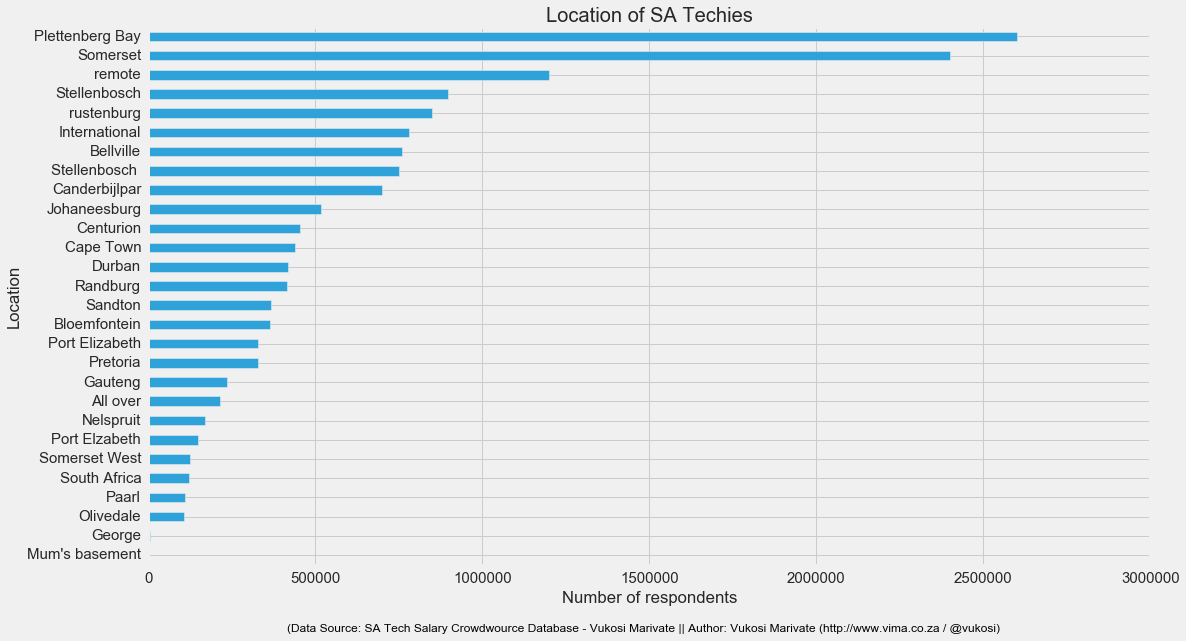

In [20]:
fig = pyplot.figure()
ax = fig.add_subplot(111) 
by_area = df.groupby('Location').mean().Annual_Base_Salary_in_Rands.order()
by_area.plot(kind='barh', fontsize=15)
ax.set_xlabel("Number of respondents")
ax.set_title("Location of SA Techies")
plt.text(0.85, -0.125,'(Data Source: SA Tech Salary Crowdwource Database - Vukosi Marivate || Author: Vukosi Marivate (http://www.vima.co.za / @vukosi)',
     horizontalalignment='right',
#      verticalalignment='center',
     transform = ax.transAxes,color='black',fontsize=12)
pyplot.savefig('../plots/location_bar_average.png',bbox_inches='tight', dpi = 300)